In [2]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [11]:
#Read the dataset to python environment

ir_df = pd.read_excel('iris.xls')
ir_df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
ir_df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
ir_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
ir_df.shape

(150, 5)

In [10]:
ir_df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [12]:
#Filling missing values.

ir_df['SW'].fillna(ir_df['SW'].mean(), inplace=True)
ir_df['SL'].fillna(ir_df['SL'].mode()[0], inplace=True)
ir_df['PL'].fillna(method = 'ffill', inplace = True)
ir_df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.0,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.0,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [13]:
ir_df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

<Figure size 3000x2000 with 0 Axes>

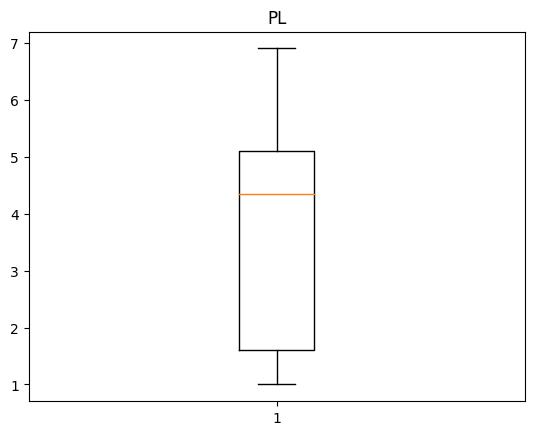

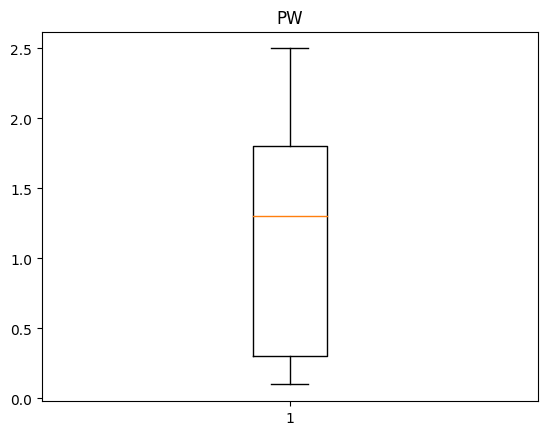

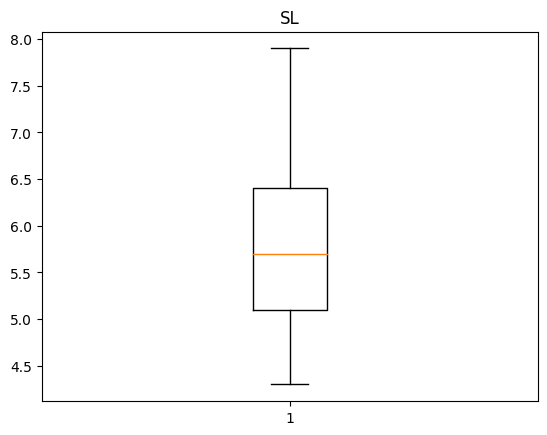

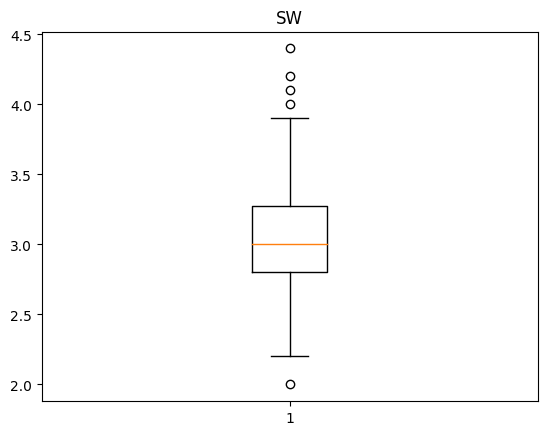

In [18]:
#Check for Outliers

num_columns=['PL','PW','SL','SW']
plt.figure(figsize=(30,20))

#boxplot
for i in num_columns:
    plt.figure()
    plt.boxplot(ir_df[i])
    plt.title(i)

In [21]:
Q1 = np.percentile(ir_df['SW'],25, method="midpoint")
Q2 = np.percentile(ir_df['SW'],50, method="midpoint")
Q3 = np.percentile(ir_df['SW'],75, method="midpoint")
print(Q1)
print(Q2)
print(Q3)
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print(low_lim)
print(up_lim)

2.8
3.0
3.25
2.1249999999999996
3.9250000000000003


In [25]:
outlier = []
for i in ir_df['SW']:
  if i < low_lim or i> up_lim:
    outlier.append(i)
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [27]:
index_SW = ir_df["SW"]>up_lim
index_SW = ir_df.loc[index_SW].index
ir_df.drop(index_SW, inplace= True)
index_SW

Int64Index([14, 15, 32, 33], dtype='int64')

In [30]:
#Labelencoding

from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

ir_df['Classification'] = le.fit_transform(ir_df['Classification'])
ir_df


,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.0,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.0,2.0,2
148,6.2,3.4,5.4,2.3,2


In [32]:
#logistic regression


x = ir_df.drop(['Classification'],axis = 1)
y = ir_df['Classification']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size=0.2, random_state=42)

In [33]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_model  = lr.fit(x_train,y_train)
lr_pred = lr_model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
from sklearn.metrics import accuracy_score, precision_score,confusion_matrix
print('Accuracy =',accuracy_score(y_test,lr_pred))

Accuracy = 0.9666666666666667


In [43]:
#KNN

from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,20)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
    classifier.fit(x_train,y_train)
    knn_pred = classifier.predict(x_test)
    acc = accuracy_score(y_test,knn_pred)
    metric_k.append(acc)
metric_k

[0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9666666666666667,
 1.0,
 0.9666666666666667,
 1.0,
 1.0]

In [46]:
classifier =KNeighborsClassifier(n_neighbors=5,metric='euclidean')
model = classifier.fit(x_train,y_train)
knn_pred = model.predict(x_test)
acc= accuracy_score(y_test,knn_pred)
print('Accuracy =',accuracy_score(y_test,knn_pred))

Accuracy = 0.9666666666666667


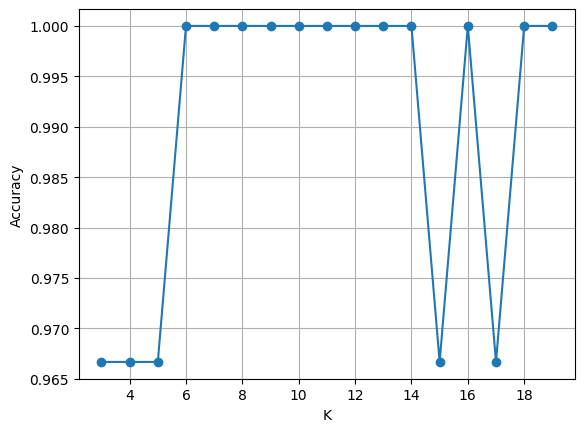

In [47]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid()

In [49]:
#SVM

from sklearn.svm import SVC
svm_class=SVC(kernel='linear')
svm_class=svm_class.fit(x_train,y_train)
svm_prediction=svm_class.predict(x_test)

confusion_matrix(y_test,svm_prediction)

array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  0, 10]])

In [50]:

svm_cls = SVC(kernel = 'rbf')
rbf_model = svm_cls.fit(x_train,y_train)
rbf_pred = rbf_model.predict(x_test)
confusion_matrix(y_test,rbf_pred)

array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  1,  9]])

In [58]:
print('Accuracy =',accuracy_score(y_test,rbf_pred))

Accuracy = 0.9666666666666667


In [52]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier
dt_class = DecisionTreeClassifier()
dt_model = dt_class.fit(x_train,y_train)
dt_pred = dt_model.predict(x_test)


confusion_matrix(y_test,dt_pred)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]])

In [53]:
print('Accuracy =',accuracy_score(y_test,dt_pred))

Accuracy = 0.9333333333333333


In [56]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier
rf_cls=RandomForestClassifier()
model_rf=rf_cls.fit(x_train,y_train)
rf_pred =model_rf.predict(x_test)
confusion_matrix(y_test,rf_pred)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]])

In [57]:
rf_cls = RandomForestClassifier(n_estimators=12,random_state=42)
model = rf_cls.fit(x_train,y_train)
rf_pred = model.predict(x_test)
print('Accuracy =',accuracy_score(y_test,rf_pred))

Accuracy = 0.9333333333333333


In [59]:
print('Logistic regression Accuracy : ',accuracy_score(y_test,lr_pred))
print('SVM linear Accuracy : ',accuracy_score(y_test,svm_prediction))
print('SVM rbf Accuracy : ',accuracy_score(y_test,rbf_pred))
print('KNN Accuracy : ',accuracy_score(y_test,knn_pred))
print('DT Accuracy : ', accuracy_score(y_test,dt_pred))
print('RF Accuracy : ', accuracy_score(y_test,rf_pred))

Logistic regression Accuracy :  0.9666666666666667
SVM linear Accuracy :  1.0
SVM rbf Accuracy :  0.9666666666666667
KNN Accuracy :  0.9666666666666667
DT Accuracy :  0.9333333333333333
RF Accuracy :  0.9333333333333333
